In [1]:
# Load data & initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from datasets import load_dataset


c:\Users\Gumiuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

# Convert job posted date column to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert skills column from string to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filter Dataframe by EU country
eu_list = [
    "Albania", "Andorra", "Austria", "Belgium", "Belarus",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Montenegro",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France",
    "Greece", "Spain", "Netherlands", "Ireland", "Iceland", "Kosovo",
    "Liechtenstein", "Lithuania", "Luxembourg", "Latvia",
    "North Macedonia", "Malta", "Moldova", "Monaco", "Germany",
    "Norway", "Poland", "Portugal", "Romania", "Russia",
    "San Marino", "Serbia", "Slovakia", "Slovenia", "Switzerland",
    "Sweden", "Turkey", "Ukraine", "Vatican City", "Hungary",
    "United Kingdom", "Italy"
]

# Filter by EU country and Data Analyst position
df_eu = df.copy()
df_eu = df_eu[(df_eu['job_location'].isin(eu_list)) & (df_eu['job_title_short'].str.lower() == "data analyst")]

# Create column with job posted month number
df_eu['job_posted_month_no'] = df_eu['job_posted_date'].dt.month

In [4]:
# Explode skill column to seperate rows
df_explode = df_eu.explode('job_skills')

# Create a pivot table with months as rows and skills as columns
df_pivot = df_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# Add a total row to compute overall skill frequency
df_pivot.loc['total'] = df_pivot.sum()

# Sort skill columns by total demand (descending)
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]  

# Remove the total row
df_pivot = df_pivot.drop('total')

In [5]:
# Aggregate total by job posted month
da_total = df_eu.groupby(by='job_posted_month_no').size()

# Convert values in the pivot table to percentage share of total monthly postings
df_percents = df_pivot.div(da_total/100,axis=0)
df_percents

job_skills,sql,excel,python,power bi,tableau,r,sas,sap,azure,powerpoint,...,macos,hugging face,qt,objective-c,npm,monday.com,sqlite,solidity,tidyr,wrike
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,46.618575,31.740307,27.141569,26.420198,17.944094,13.976555,11.902615,6.311993,7.574391,3.697024,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090171,0.000000,0.00000,0.000000
2,45.972739,28.872367,28.128872,20.570012,17.967782,14.250310,12.391574,6.319703,5.204461,4.337051,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,43.750000,29.910714,27.976190,22.172619,18.601190,11.755952,9.523810,5.505952,5.952381,5.654762,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,43.975904,28.463855,28.614458,25.000000,19.126506,11.746988,17.469880,6.626506,7.530120,4.668675,...,0.00000,0.000000,0.000000,0.000000,0.150602,0.000000,0.000000,0.000000,0.00000,0.000000
5,45.709571,30.363036,30.198020,23.927393,17.986799,11.716172,9.900990,7.590759,8.250825,5.445545,...,0.00000,0.000000,0.000000,0.165017,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,39.860140,31.188811,24.195804,22.377622,18.181818,9.370629,10.349650,7.132867,6.013986,5.454545,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.13986,0.000000
7,45.006017,34.777377,26.113117,25.270758,20.336943,12.876053,11.552347,9.867629,7.340554,5.655836,...,0.00000,0.120337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,41.954708,31.346841,27.175209,21.215733,17.401669,14.779499,10.727056,9.296782,5.840286,4.171633,...,0.11919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,42.201835,29.867482,24.872579,20.489297,16.309888,11.824669,10.601427,5.810398,6.014271,3.669725,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101937,0.00000,0.000000


In [6]:
# Reset index and convert numeric month value to month abbreviation
df_percents = df_percents.reset_index()
df_percents['job_posted_month'] = df_percents['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))

# Use formatted month names as index and remove numeric column
df_percents = df_percents.set_index('job_posted_month')
df_percents = df_percents.drop(columns='job_posted_month_no')   

In [7]:
# Filter by top 5 skills
df_percents_top10 = df_percents.iloc[:,:5]
df_percents_top10

job_skills,sql,excel,python,power bi,tableau
job_posted_month,,,,,
Jan,46.618575,31.740307,27.141569,26.420198,17.944094
Feb,45.972739,28.872367,28.128872,20.570012,17.967782
Mar,43.750000,29.910714,27.976190,22.172619,18.601190
Apr,43.975904,28.463855,28.614458,25.000000,19.126506
May,45.709571,30.363036,30.198020,23.927393,17.986799
Jun,39.860140,31.188811,24.195804,22.377622,18.181818
Jul,45.006017,34.777377,26.113117,25.270758,20.336943
Aug,41.954708,31.346841,27.175209,21.215733,17.401669
Sep,42.201835,29.867482,24.872579,20.489297,16.309888


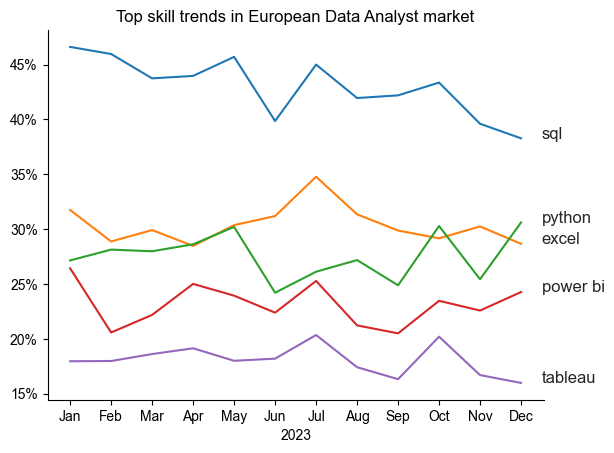

In [9]:
from matplotlib.ticker import PercentFormatter

# Plot percentage trends for top skills
sns.lineplot(
    data=df_percents_top10,
    dashes=False,
    palette='tab10'
)
# Apply theme and remove top/right spines
sns.set_theme(style='ticks')
sns.despine()

# Add chart title, remove legend, label x-axis
plt.title('Top skill trends in European Data Analyst market')
plt.legend().remove()
plt.xlabel('2023')

# Format y-axis to display values as percentages
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=False))

# Add end-of-line labels for better readability
for i in range(5):
    plt.text(11.5, df_percents_top10.iloc[-1,i], df_percents.columns[i])